In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nr_05.46.33_1374.dat", unpack=True)
print(data[0])

[ 41.114941  40.871262  40.815899  41.454304  41.359623  40.411366
  40.183311  40.343178  39.603008  38.692944  37.887398  37.365383
  37.738373  37.272488  36.677948  36.975677  37.857265  40.003731
  44.261272  44.968338  44.077579  43.787144  43.643986  43.613731
  44.746632  44.581898  44.591869  45.416084  45.725254  46.447552
  46.855122  46.570637  47.094131  48.534721  49.506374  49.816494
  50.791176  51.14455   50.785454  50.847305  49.641407  48.895977
  49.287418  48.961792  48.881607  48.163143  46.99622   46.890213
  46.54882   47.318638  46.516766  45.062954  44.526237  43.801826
  43.021454  42.493469  42.502258  42.214493  43.219639  43.664928
  43.515324  43.75679   44.260887  44.491779  45.355762  45.537128
  45.736683  46.431011  46.297836  46.924198  47.22612   47.101933
  46.757427  46.765846  46.7827    47.277603  47.677383  47.700264
  47.76511   48.853512  49.861618  50.002777  51.208092  51.617199
  51.489353  51.262894  50.867611  51.098171  52.154076  53.32

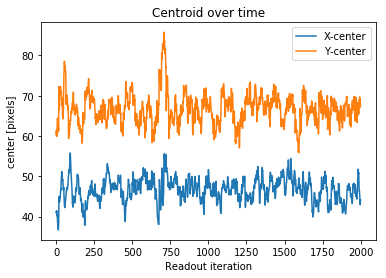

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nr_05.46.33_1374-xycentroid.png")

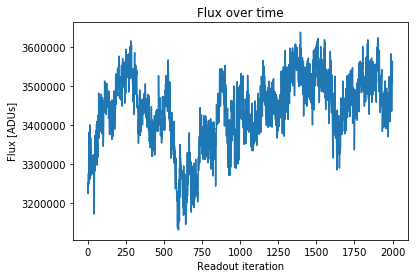

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nr_05.46.33_1374-flux.png")

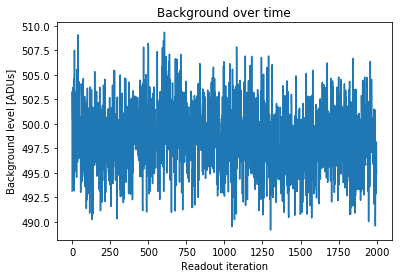

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nr_05.46.33_1374-background.png")

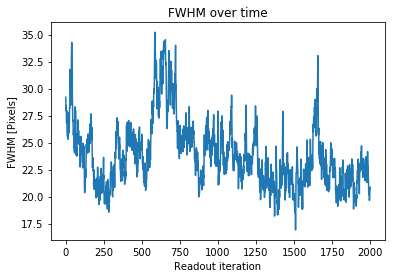

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nr_05.46.33_1374-fwhm.png")

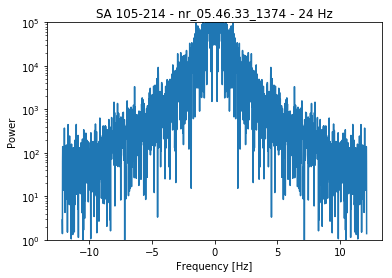

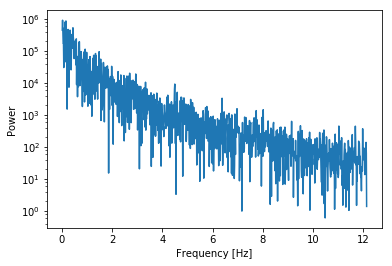

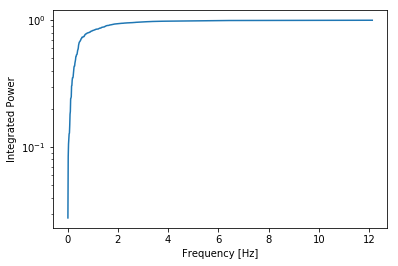

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.041196 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nr_05.46.33_1374 - 24 Hz")
plt.savefig (" nr_05.46.33_1374-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nr_05.46.33_1374-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nr_05.46.33_1374-integratedpower.png")